<a href="https://colab.research.google.com/github/deltorobarba/sciences/blob/master/chemistry_benzene.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Benzene (C₆H₆)**

[Benzene](https://en.m.wikipedia.org/wiki/Benzene) is an organic chemical compound with the molecular formula C6H6. The benzene molecule is composed of six carbon atoms joined in a planar hexagonal ring with one hydrogen atom attached to each. Because it contains only carbon and hydrogen atoms, benzene is classed as a hydrocarbon.

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1825.png)




* **Building Block for Complex Organic Molecules and PAHs**: Benzene is the simplest aromatic hydrocarbon and serves as a crucial building block for larger, more complex organic molecules, including polycyclic aromatic hydrocarbons (PAHs). PAHs are thought to carry a significant fraction of the interstellar carbon and are ubiquitous in various astrophysical environments. Its spectral signatures provide insights into the formation pathways of these complex molecules, which are vital for understanding the carbon budget in the interstellar medium and the chemical evolution of star-forming regions.

* **Presence in Protoplanetary Disks and Planet Formation**: The detection of benzene in protoplanetary disks, especially those around very low-mass stars, is highly significant. Its presence, often alongside other hydrocarbons, can indicate a rich carbon chemistry in these planet-forming environments. Understanding its distribution and abundance helps to trace the initial composition of planet-forming material and the potential for organic enrichment in forming planets. This can have implications for the types of planets that form and their initial chemical make-up.

* **Indicator of Chemical Processes in Solar System Bodies**: Benzene has been detected in the atmospheres of gas giants like Jupiter and Saturn, and notably on Titan, Saturn's largest moon. On Titan, it's a component of the complex organic chemistry occurring in its atmosphere and on its surface. Spectral observations of benzene in these bodies provide clues about their atmospheric composition, photochemical processes, and the presence of complex organic aerosols, contributing to our understanding of their unique chemical evolution.

* **Formation and Evolution in Interstellar Ices and Clouds**: While detection of gaseous benzene can be challenging in certain interstellar environments, it is found in interstellar ices on dust grains in dense molecular clouds. Studying benzene in these icy mantles reveals information about its formation mechanisms in cold, dense environments, possibly through reactions on grain surfaces or gas-phase pathways. Its presence in comets further suggests its role in delivering complex organic material from the interstellar medium to the early Solar System, potentially contributing to the inventory of prebiotic molecules on early Earth.

* **Observable Through Vibrational Bands in Infrared and UV Wavelengths**: Benzene exhibits characteristic absorption and emission features across various wavelengths, including the infrared region due to its ro-vibrational bands (e.g., around 1600 cm⁻¹ and 1500-1430 cm⁻¹ for C=C stretches, and C-H stretches from 3100-3000 cm⁻¹). It also has significant electronic transitions in the ultraviolet (UV) region. These spectral fingerprints, particularly in the infrared, are accessible to powerful telescopes like the James Webb Space Telescope (JWST) and other ground and space-based observatories, enabling its detection and detailed characterization in diverse astrophysical settings.

In [ ]:
!pip install pyscf geometric -q
import numpy as np
import matplotlib.pyplot as plt
from pyscf import gto, scf, hessian, dft, tddft, mp, cc
from pyscf.geomopt.geometric_solver import optimize

In [ ]:
# Define molecule
mol = gto.Mole()
mol.atom = '''
    C    0.000000    1.396763    0.000000
    C    1.209587    0.698382    0.000000
    C    1.209587   -0.698382    0.000000
    C    0.000000   -1.396763    0.000000
    C   -1.209587   -0.698382    0.000000
    C   -1.209587    0.698382    0.000000
    H    0.000000    2.480310    0.000000
    H    2.146325    1.240155    0.000000
    H    2.146325   -1.240155    0.000000
    H    0.000000   -2.480310    0.000000
    H   -2.146325   -1.240155    0.000000
    H   -2.146325    1.240155    0.000000
'''

# Name
molecule = 'Benzene (C₆H₆)'

In [ ]:
# Build molecule (with gto.M() function)
mol.atom = mol.atom
mol.basis = 'cc-pvdz' # Alternative basis set: sto-3g, cc-pvdz,6-31G
mol.symmetry = True
mol.spin = 0          # Benzene is a highly stable aromatic molecule. Its electrons, includ the delocalized pi electrons, are all paired in the ground state.
# Aromatic molecule with delocalized pi electrons, all paired. Ground state is a singlet. mol.spin = 0 (since S=0, 2S=0)
# Note: While there can be excited triplet states or even highly unstable triplet dianions, the ground state of neutral benzene is unequivocally a singlet.
mol.build()

In [ ]:
print("-" * 20)
print(f"{molecule} molecule symmetry:")
print(f" Top group: {mol.topgroup}")
print(f" Group name: {mol.groupname}")
print("-" * 20)

--------------------
Benzene (C₆H₆) molecule symmetry:
 Top group: D2h
 Group name: D2h
--------------------


Point Group Symmetry
* **Shape:** Planar Hexagonal
* **Symmetry Operations:** One $C_6$ rotation axis, three $C_2$ axes perpendicular to $C_6$, three $C_2'$ axes perpendicular to $C_6$ and passing through atoms, a horizontal mirror plane ($\sigma_h$), and six vertical mirror planes.
* **Point Group:** **$D_{6h}$**
* *A very high-symmetry molecule, but not linear.*

* **Stable Electronic Structure of Benzene:** Benzene's planar, hexagonal, and highly symmetric geometry, combined with a delocalized $\pi$-electron cloud, contributes to a very stable electronic structure, as reflected by its total DFT energy.
* **B3LYP Functional for Accurate Calculations:** The B3LYP hybrid functional, which combines Becke's 3-parameter exchange and Lee-Yang-Parr correlation functionals, accurately treats electron exchange and correlation, leading to precise energy calculations for molecules like benzene.
* **Aromatic Stabilization through Electron Delocalization:** The resonance and delocalization of $\pi$-electrons across the entire carbon ring significantly lower benzene's total energy, contributing to its high stability, often referred to as aromatic or resonance stabilization.
* **Components of DFT Energy Calculation:** The DFT method calculates the total energy by considering attractive electron-nuclear interactions, repulsive electron-electron and nuclear-nuclear interactions, and crucial electron correlation effects accounted for by B3LYP. The choice of basis set also influences the accuracy of this calculated energy.
* **Significance of Negative Energy Value:** The negative total energy value of -232.309 Hartree signifies a bound and stable molecular system. A more negative value indicates greater stability, which for benzene, is a direct consequence of its aromatic structure and electron delocalization.

In [ ]:
# Ground State Energy with Hartree-Fock (Slater Determinant)
mf = scf.RHF(mol)
mf.kernel()

converged SCF energy = -230.721941890601


np.float64(-230.72194189060136)

converged SCF energy = -230.721941890602


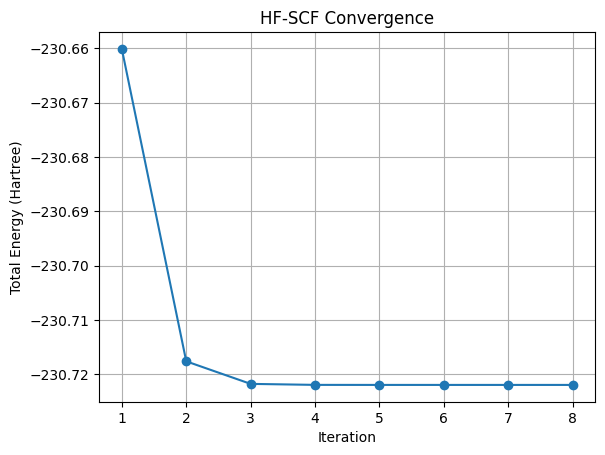

Ground state energy for Benzene (C₆H₆): -230.72194189060158 Hartree


In [ ]:
# Visualization of calculation process (Hartree-Fock)
mf = scf.RHF(mol)                         # Set method
conv_data = []                            # Store convergence data
def callback(envs):                       # Callback function to collect convergence information
    conv_data.append(envs['e_tot'])       # Captures energy values at each iteration to track process
mf.callback = callback                    # Set callback directly on the mf object
energy = mf.kernel()                      # Perform HF calculation
energies = conv_data                      # Extract energy values
iterations = range(1, len(energies) + 1)  # Extract iteration numbers
plt.plot(iterations, energies, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Total Energy (Hartree)')
plt.title('HF-SCF Convergence')
plt.grid(True)
plt.show()
print(f"Ground state energy for {molecule}: {energy} Hartree")

In [ ]:
# Ground State Energy with DFT (Kohn-Sham)
mf = dft.RKS(mol)
mf.xc = 'B3LYP'    # Exchange-correlation functional
mf.kernel()

converged SCF energy = -232.26252959283


np.float64(-232.2625295928303)

In [ ]:
# Ground State Energy with Møller-Plesset Perturbation Theory (Post Hartree Fock)
mf = scf.RHF(mol)
mf.kernel()
mp2 = mp.MP2(mf) # MP2 single point energy calculation
energy_mp2 = mp2.kernel()
print(f"MP2 energy: {energy_mp2[0]} Hartree")

converged SCF energy = -230.721941890602
E(MP2) = -231.520586623213  E_corr = -0.798644732611156
E(SCS-MP2) = -231.498142740132  E_corr = -0.776200849530373
MP2 energy: -0.7986447326111555 Hartree


In [ ]:
# Ground State Energy with Coupled Cluster (Post Hartree Fock)
mf = scf.RHF(mol)                  # Perform a HF-SCF calculation to obtain the reference wavefunction
hf_energy = mf.kernel()
ccsd_calc = cc.CCSD(mf)            # Perform a Coupled Cluster calculation
ccsd_energy = ccsd_calc.kernel()
ccsd_t_energy = ccsd_calc.ccsd_t() # (Optional) Include perturbative triple excitations (CCSD(T))

# Ensure that ccsd_t_energy is a scalar (take the first element if it's an array)
if isinstance(ccsd_t_energy, (list, tuple)) or hasattr(ccsd_t_energy, "__len__"):
    ccsd_t_energy = ccsd_t_energy[0]  # Take the first value if it returns multiple results

# Print the results
#print(f"HF-SCF energy: {hf_energy} Hartree")
#print(f"CCSD energy: {ccsd_energy} Hartree")
#print(f"CCSD(T) energy: {ccsd_energy + ccsd_t_energy} Hartree")

converged SCF energy = -230.721941890602
E(CCSD) = -231.5589087600086  E_corr = -0.836966869406218
CCSD(T) correction = -0.0362693939492215


In [ ]:
# Excited electronic states
myhf = scf.RHF(mol).run()     # Perform a ground-state calculation
mytd = tddft.TDA(myhf).run()  # Excited-state calculation using TDDFT
#mol = gto.M(verbose = 4)     # Add verbose for more details
mytd.analyze()

converged SCF energy = -230.721941890602
Excited State energies (eV)
[6.18219139 6.35111076 8.35767891]

** Singlet excitation energies and oscillator strengths **
Excited State   1:  B2u      6.18219 eV    200.55 nm  f=0.0000
Excited State   2:  B3u      6.35111 eV    195.22 nm  f=0.0000
Excited State   3:  B3u      8.35768 eV    148.35 nm  f=1.1237


In [ ]:
# Geometry Optimization (in Angstroms) with HF or DFT
mol_eq = optimize(mf)
print(mol_eq.atom_coords())

geometric-optimize called with the following command line:
/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-e676cf59-f507-4790-a46e-96d7e790fa52.json

                                        ())))))))))))))))/                     
                                    ())))))))))))))))))))))))),                
                                *)))))))))))))))))))))))))))))))))             
                        #,    ()))))))))/                .)))))))))),          
                      #%%%%,  ())))))                        .))))))))*        
                      *%%%%%%,  ))              ..              ,))))))).      
                        *%%%%%%,         ***************/.        .)))))))     
                #%%/      (%%%%%%,    /*********************.       )))))))    
              .%%%%%%#      *%%%%%%,  *******/,     **********,      .))))))   
                .%%%%%%/      *%%%%%%,  **              ********    


Geometry optimization cycle 1
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   0.000000   1.396763   0.000000    0.000000  0.000000  0.000000
   C   1.209587   0.698382   0.000000    0.000000  0.000000  0.000000
   C   1.209587  -0.698382   0.000000    0.000000  0.000000  0.000000
   C   0.000000  -1.396763   0.000000    0.000000  0.000000  0.000000
   C  -1.209587  -0.698382   0.000000    0.000000  0.000000  0.000000
   C  -1.209587   0.698382   0.000000    0.000000  0.000000  0.000000
   H   0.000000   2.480310   0.000000    0.000000  0.000000  0.000000
   H   2.146325   1.240155   0.000000    0.000000  0.000000  0.000000
   H   2.146325  -1.240155   0.000000    0.000000  0.000000  0.000000
   H   0.000000  -2.480310   0.000000    0.000000  0.000000  0.000000
   H  -2.146325  -1.240155   0.000000    0.000000  0.000000  0.000000
   H  -2.146325   1.240155   0.000000    0.000000  0.000000  0.000000
converged SCF energy = -230.7219

Step    0 : Gradient = 5.910e-03/8.607e-03 (rms/max) Energy = -230.7219418906
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 4.61656e-01 4.61679e-01 4.61679e-01



Geometry optimization cycle 2
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   0.000000   1.385979   0.000000    0.000000 -0.010784  0.000000
   C   1.201412   0.693345   0.000000   -0.008175 -0.005037  0.000000
   C   1.201412  -0.693345   0.000000   -0.008175  0.005037  0.000000
   C   0.000000  -1.385979   0.000000    0.000000  0.010784  0.000000
   C  -1.201412  -0.693345   0.000000    0.008175  0.005037  0.000000
   C  -1.201412   0.693345   0.000000    0.008175 -0.005037  0.000000
   H   0.000000   2.467884   0.000000    0.000000 -0.012426  0.000000
   H   2.138300   1.234736   0.000000   -0.008025 -0.005419  0.000000
   H   2.138300  -1.234736   0.000000   -0.008025  0.005419  0.000000
   H   0.000000  -2.467884   0.000000    0.000000  0.012426  0.000000
   H  -2.138300  -1.234736   0.000000    0.008025  0.005419  0.000000
   H  -2.138300   1.234736  -0.000000    0.008025 -0.005419 -0.000000
converged SCF energy = -230.7223

Step    1 : Displace = 1.035e-02/1.243e-02 (rms/max) Trust = 1.000e-01 (=) Grad = 1.333e-03/2.133e-03 (rms/max) E (change) = -230.7223268773 (-3.850e-04) Quality = 0.773
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 4.61656e-01 4.61679e-01 5.70597e-01



Geometry optimization cycle 3
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   0.000000   1.390463   0.000000    0.000000  0.004484  0.000000
   C   1.201474   0.694331   0.000000    0.000061  0.000987  0.000000
   C   1.201474  -0.694331   0.000000    0.000061 -0.000987  0.000000
   C   0.000000  -1.390463   0.000000    0.000000 -0.004484  0.000000
   C  -1.201474  -0.694331   0.000000   -0.000061 -0.000987  0.000000
   C  -1.201474   0.694331  -0.000000   -0.000061  0.000987 -0.000000
   H   0.000000   2.472717   0.000000    0.000000  0.004833  0.000000
   H   2.139024   1.234896   0.000000    0.000724  0.000160  0.000000
   H   2.139024  -1.234896   0.000000    0.000724 -0.000160  0.000000
   H   0.000000  -2.472717   0.000000    0.000000 -0.004833  0.000000
   H  -2.139024  -1.234896   0.000000   -0.000724 -0.000160  0.000000
   H  -2.139024   1.234896  -0.000000   -0.000724  0.000160 -0.000000
converged SCF energy = -230.7223

Step    2 : Displace = 2.784e-03/4.833e-03 (rms/max) Trust = 1.414e-01 (+) Grad = 4.572e-04/8.848e-04 (rms/max) E (change) = -230.7223446466 (-1.777e-05) Quality = 0.718
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 4.61656e-01 4.61679e-01 6.28784e-01



Geometry optimization cycle 4
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   0.000000   1.386485   0.000000    0.000000 -0.003978  0.000000
   C   1.205253   0.694744   0.000000    0.003779  0.000413  0.000000
   C   1.205253  -0.694744   0.000000    0.003779 -0.000413  0.000000
   C   0.000000  -1.386485   0.000000    0.000000  0.003978  0.000000
   C  -1.205253  -0.694744   0.000000   -0.003779 -0.000413  0.000000
   C  -1.205253   0.694744  -0.000000   -0.003779  0.000413 -0.000000
   H  -0.000000   2.468816   0.000000   -0.000000 -0.003901  0.000000
   H   2.142032   1.236883   0.000000    0.003008  0.001987  0.000000
   H   2.142032  -1.236883   0.000000    0.003008 -0.001987  0.000000
   H   0.000000  -2.468816   0.000000    0.000000  0.003901  0.000000
   H  -2.142032  -1.236883   0.000000   -0.003008 -0.001987  0.000000
   H  -2.142032   1.236883  -0.000000   -0.003008  0.001987 -0.000000
converged SCF energy = -230.7223

Step    3 : Displace = 3.785e-03/3.978e-03 (rms/max) Trust = 1.414e-01 (=) Grad = 1.034e-03/1.738e-03 (rms/max) E (change) = -230.7223297004 (+1.495e-05) Quality = -1.127
Rejecting step - quality is lower than -1.0
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 4.61656e-01 4.61679e-01 6.28784e-01



Geometry optimization cycle 5
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   0.000000   1.388214   0.000000    0.000000  0.001729  0.000000
   C   1.203340   0.694441   0.000000   -0.001913 -0.000303  0.000000
   C   1.203340  -0.694441   0.000000   -0.001913  0.000303  0.000000
   C   0.000000  -1.388214   0.000000    0.000000 -0.001729  0.000000
   C  -1.203340  -0.694441   0.000000    0.001913  0.000303  0.000000
   C  -1.203340   0.694441  -0.000000    0.001913 -0.000303 -0.000000
   H  -0.000000   2.470458   0.000000    0.000000  0.001642  0.000000
   H   2.140474   1.235835   0.000000   -0.001558 -0.001048  0.000000
   H   2.140474  -1.235835   0.000000   -0.001558  0.001048  0.000000
   H   0.000000  -2.470458   0.000000    0.000000 -0.001642  0.000000
   H  -2.140474  -1.235835   0.000000    0.001558  0.001048  0.000000
   H  -2.140474   1.235835  -0.000000    0.001558 -0.001048 -0.000000
converged SCF energy = -230.7223

Step    4 : Displace = 1.963e-03/2.259e-03 (rms/max) Trust = 1.892e-03 (x) Grad = 3.020e-04/5.176e-04 (rms/max) E (change) = -230.7223479819 (-3.335e-06) Quality = 0.329
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 4.61679e-01 4.81032e-01 7.09994e-01



Geometry optimization cycle 6
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   0.000000   1.388524   0.000000    0.000000  0.000310  0.000000
   C   1.202548   0.694276   0.000000   -0.000792 -0.000165  0.000000
   C   1.202548  -0.694276   0.000000   -0.000792  0.000165  0.000000
   C   0.000000  -1.388524   0.000000    0.000000 -0.000310  0.000000
   C  -1.202548  -0.694276   0.000000    0.000792  0.000165  0.000000
   C  -1.202548   0.694276  -0.000000    0.000792 -0.000165 -0.000000
   H   0.000000   2.470739   0.000000    0.000000  0.000282  0.000000
   H   2.139763   1.235413   0.000000   -0.000711 -0.000422  0.000000
   H   2.139763  -1.235413   0.000000   -0.000711  0.000422  0.000000
   H   0.000000  -2.470739   0.000000    0.000000 -0.000282  0.000000
   H  -2.139763  -1.235413   0.000000    0.000711  0.000422  0.000000
   H  -2.139763   1.235413  -0.000000    0.000711 -0.000422 -0.000000
converged SCF energy = -230.7223

Step    5 : Displace = 6.894e-04/8.271e-04 (rms/max) Trust = 1.892e-03 (=) Grad = 3.476e-05/5.783e-05 (rms/max) E (change) = -230.7223495901 (-1.608e-06) Quality = 0.945
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 4.61679e-01 5.34036e-01 6.74783e-01



Geometry optimization cycle 7
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   0.000000   1.388621   0.000000    0.000000  0.000097  0.000000
   C   1.202567   0.694307   0.000000    0.000019  0.000031  0.000000
   C   1.202567  -0.694307   0.000000    0.000019 -0.000031  0.000000
   C   0.000000  -1.388621   0.000000    0.000000 -0.000097  0.000000
   C  -1.202567  -0.694307   0.000000   -0.000019 -0.000031  0.000000
   C  -1.202567   0.694307  -0.000000   -0.000019  0.000031 -0.000000
   H   0.000000   2.470849   0.000000    0.000000  0.000110  0.000000
   H   2.139802   1.235421   0.000000    0.000039  0.000008  0.000000
   H   2.139802  -1.235421   0.000000    0.000039 -0.000008  0.000000
   H   0.000000  -2.470849   0.000000    0.000000 -0.000110  0.000000
   H  -2.139802  -1.235421   0.000000   -0.000039 -0.000008  0.000000
   H  -2.139802   1.235421  -0.000000   -0.000039  0.000008 -0.000000
converged SCF energy = -230.7223

Step    6 : Displace = 6.738e-05/1.095e-04 (rms/max) Trust = 2.676e-03 (+) Grad = 3.614e-06/8.034e-06 (rms/max) E (change) = -230.7223496070 (-1.686e-08) Quality = 0.894
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 4.61679e-01 5.34036e-01 6.74783e-01
Converged! =D

    #==========================================================================#
    #| If this code has benefited your research, please support us by citing: |#
    #|                                                                        |#
    #| Wang, L.-P.; Song, C.C. (2016) "Geometry optimization made simple with |#
    #| translation and rotation coordinates", J. Chem, Phys. 144, 214108.     |#
    #| http://dx.doi.org/10.1063/1.4952956                                    |#
    #==========================================================================#
    Time elapsed since start of run_optimizer: 179.599 seconds


[[ 0.          2.62411355  0.        ]
 [ 2.27252245  1.31204923  0.        ]
 [ 2.27252245 -1.31204923  0.        ]
 [ 0.         -2.62411355  0.        ]
 [-2.27252245 -1.31204923  0.        ]
 [-2.27252245  1.31204923  0.        ]
 [ 0.          4.66922739  0.        ]
 [ 4.04363919  2.33460726  0.        ]
 [ 4.04363919 -2.33460726  0.        ]
 [ 0.         -4.66922739  0.        ]
 [-4.04363919 -2.33460726  0.        ]
 [-4.04363919  2.33460726  0.        ]]


converged SCF energy = -230.721941890601


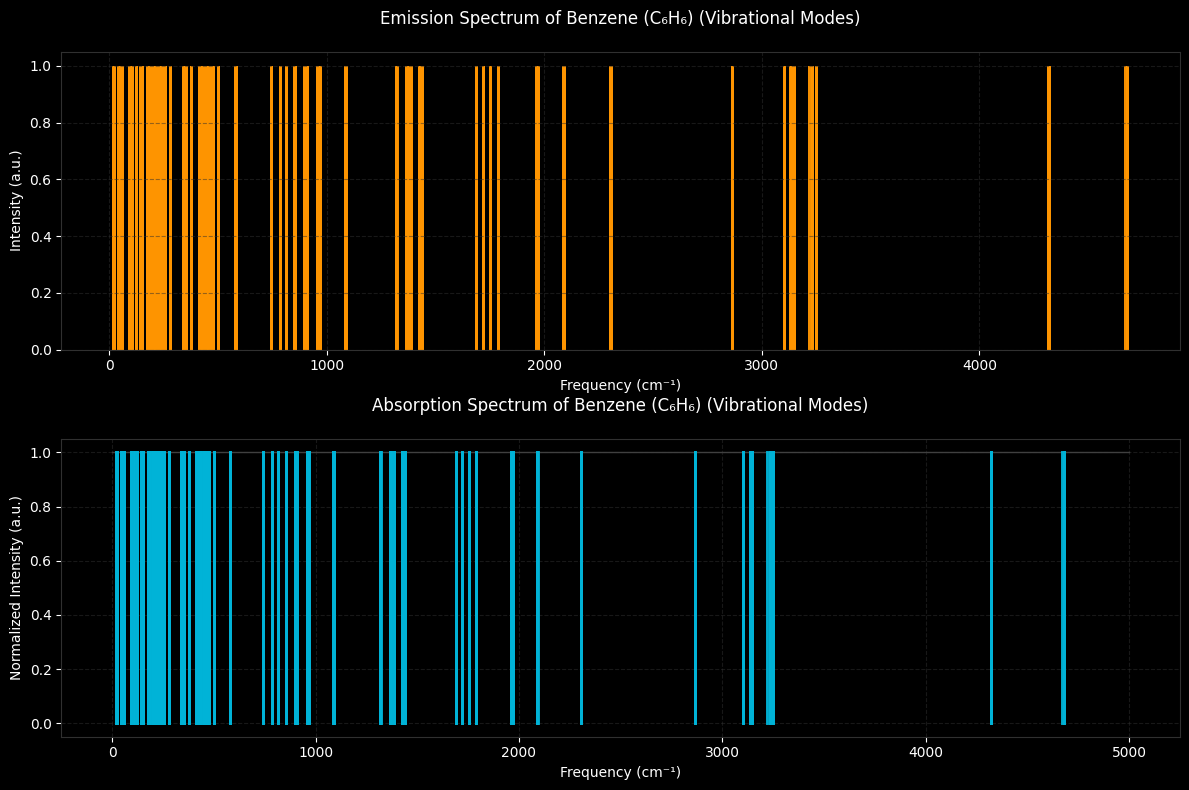

In [ ]:
# Emission and Absorption Spectra (Electronic Frequencies / Transitions)

mf = scf.RHF(mol)                                     # Perform a ground-state calculation for molecular vibrational frequencies
mf.kernel()
hess = hessian.RHF(mf).kernel()                       # Calculate the Hessian matrix (force constants)
frequencies = np.linalg.eigvalsh(hess)                # Diagonalize the Hessian to get vibrational frequencies
frequencies = np.sqrt(np.abs(frequencies)) * 5140.48  # Conversion factor to cm^-1 (more accurate)
frequencies = frequencies[(frequencies > 0) & (frequencies < 5000)]  # Filter out non-physical (imaginary) frequencies and limit to realistic range

# Plot stlyes
EMISSION_COLOR = '#ff9500'  # Bright orange
ABSORPTION_COLOR = '#00b4d8'  # Bright blue
BASELINE_COLOR = '#404040'  # Dark gray
GRID_COLOR = '#303030'  # Slightly lighter gray for grid
plt.figure(figsize=(12, 8), facecolor='black') # Create figure with dark background
plt.style.use('dark_background') # Set the style to dark background

# Emission Spectrum
plt.subplot(2, 1, 1)
plt.bar(frequencies, height=1.0, width=15.0, color=EMISSION_COLOR, alpha=0.8)
plt.xlabel('Frequency (cm⁻¹)', color='white', fontsize=10)
plt.ylabel('Intensity (a.u.)', color='white', fontsize=10)
plt.title(f'Emission Spectrum of {molecule} (Vibrational Modes)',
         color='white', pad=20, fontsize=12)

# Customize grid and spines
plt.grid(True, color=GRID_COLOR, linestyle='--', alpha=0.5)
for spine in plt.gca().spines.values():
    spine.set_color(GRID_COLOR)
plt.tick_params(colors='white')

# Absorption Spectrum
plt.subplot(2, 1, 2)
# Create baseline
plt.plot(np.linspace(0, 5000, 1000), np.ones(1000),
         color=BASELINE_COLOR, linewidth=1)

# Plot absorption lines with gradient effect
for freq in frequencies:
    y = np.linspace(0, 1, 100)
    x = np.ones_like(y) * freq
    plt.plot(x, y, color=ABSORPTION_COLOR,
            alpha=0.8, linewidth=2)

plt.xlabel('Frequency (cm⁻¹)', color='white', fontsize=10)
plt.ylabel('Normalized Intensity (a.u.)', color='white', fontsize=10)
plt.title(f'Absorption Spectrum of {molecule} (Vibrational Modes)',
         color='white', pad=20, fontsize=12)

# Customize grid and spines
plt.grid(True, color=GRID_COLOR, linestyle='--', alpha=0.5)
for spine in plt.gca().spines.values():
    spine.set_color(GRID_COLOR)
plt.tick_params(colors='white')

# Adjust layout and display
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

# Set figure background to black
plt.gcf().patch.set_facecolor('black')

plt.show()